## Ejemplo 1: Conectándose a una base de datos remota

### 1. Objetivos:
    - Usar `mysql-connector-python` para conectarse a una base de datos remota.
 
---
    
### 2. Desarrollo:

In [3]:
!pip install mysql-connector-python

#### a) Realizar una conexión y el `cursor`

Para conectarnos necesitamos primero importar la librería:

In [16]:
import mysql.connector

Después necesitamos saber la siguiente información acerca de la instancia de MySQL a la que queremos conectarnos:

1. Host
2. Puerto
3. Usuario
4. Contraseña
5. Base de datos a la que queremos conectarnos (recuerda que MySQL **no** es una base de datos, es un Sistema de Gestión de Bases de Datos; es decir, es software que nos ayuda a organizar bases de datos para que sean de fácil acceso)

Todos esos datos los usamos para crear una conexión:

In [15]:
# Llenar esta información con los datos que te compartan los ingenieros de Bedu

cnx = mysql.connector.connect(
    host="ec2-34-222-235-52.us-west-2.compute.amazonaws.com",
    port=3306,
    user="data",
    password='khQ9--mp6LWq97iA',
    database='movielens'
)

Ahora, para poder realizar lecturas a nuestra base de datos, tenemos que crear un objeto llamado `cursor`:

In [17]:
cursor = cnx.cursor()

In [18]:
type(cursor)

mysql.connector.cursor_cext.CMySQLCursor

Éste objeto lo podemos usar para realizar cualquier consulta en lenguaje SQL. Por ejemplo, veamos qué tablas existen en nuestra base de datos:

In [19]:
cursor.execute("SHOW TABLES")

Después de ejecutar el comando, tenemos que extraer la información de esta manera:

In [20]:
result = cursor.fetchall()

In [21]:
result

[('age_ranges',), ('movies',), ('occupations',), ('ratings',), ('users',)]

Listo. Sabemos que tenemos 5 tablas en nuestra base de datos.

Por último, es importante cerrar nuestro `cursor` para no utilizar memoria extra en nuestra computadora:

In [12]:
cursor.close()

True

In [22]:
import pandas as pd

In [ ]:
query = "INSERT INTO nombrecitos (col1, col2) VALUES (%s, %s)"
data = [
        ("rafael", "arias"),
        ("angelica", "dominguez")]

In [66]:
#RETO 2
cursor = cnx.cursor()
cursor.execute("SELECT * FROM users")
result = cursor.fetchall()
df_users = pd.DataFrame(result, columns=['user_id', 'gender', 'age', 'occupation', 'cp'])

cursor.execute("SELECT * FROM movies")
result = cursor.fetchall()
df_movies = pd.DataFrame(result, columns=['movie_id', 'title', 'genres'])

cursor.execute("SELECT * FROM ratings")
result = cursor.fetchall()
df_ratings = pd.DataFrame(result, columns=['user_id', 'movie_id', 'rating', 'timestamp'])

cursor.execute("SELECT * FROM occupations")
result = cursor.fetchall()
df_occupations = pd.DataFrame(result, columns=['occupation_id', 'description'])

cursor.execute("SELECT * FROM age_ranges")
result = cursor.fetchall()
df_age_ranges = pd.DataFrame(result, columns=['age_id', 'age_range'])

cursor.close()

True

In [67]:
df_users = df_users.set_index('user_id', drop=True)
df_users

,gender,age,occupation,cp
user_id,,,,
1,F,1,10,48067
2,M,56,16,70072
3,M,25,15,55117
4,M,45,7,02460
5,M,25,20,55455
...,...,...,...,...
6036,F,25,15,32603
6037,F,45,1,76006
6038,F,56,1,14706


In [68]:
df_movies = df_movies.set_index('movie_id', drop=True)
df_movies

,title,genres
movie_id,,
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy
...,...,...
3948,Meet the Parents (2000),Comedy
3949,Requiem for a Dream (2000),Drama
3950,Tigerland (2000),Drama


In [69]:
df_occupations = df_occupations.set_index('occupation_id', drop=True)
df_occupations

,description
occupation_id,
0,other or not specified
1,academic/educator
2,artist
3,clerical/admin
4,college/grad student
5,customer service
6,doctor/health care
7,executive/managerial
8,farmer


In [70]:
df_age_ranges = df_age_ranges.set_index('age_id', drop=True)
df_age_ranges

,age_range
age_id,
1,Under 18
18,18-24
25,25-34
35,35-44
45,45-49
50,50-55
56,56+


In [72]:
df_users.to_csv('drive/MyDrive/BEDU/df_users.csv')
df_ratings.to_csv('drive/MyDrive/BEDU/df_ratings.csv')
df_movies.to_csv('drive/MyDrive/BEDU/df_movies.csv')
df_occupations.to_csv('drive/MyDrive/BEDU/df_occupations.csv')
df_age_ranges.to_csv('drive/MyDrive/BEDU/df_age_ranges.csv')

In [73]:
#RETOT 3
df_users_plus = pd.merge(df_users, df_occupations, left_on='occupation', right_index=True) 
#usa la columa de ls izquierda para unir el indice de la tabla derecha

In [74]:
df_users_plus = pd.merge(df_users_plus, df_age_ranges, left_on='age', right_index=True) 

In [75]:
df_users_plus = df_users_plus.rename(columns={'occupation': 'occupation_id', 'description': 'occupation', 'age':'age_id'})

In [76]:
df_users_plus.to_csv('drive/MyDrive/BEDU/df_users_plus.csv')
df_users_plus

,gender,age_id,occupation_id,cp,occupation,age_range
user_id,,,,,,
1,F,1,10,48067,K-12 student,Under 18
19,M,1,10,48073,K-12 student,Under 18
51,F,1,10,10562,K-12 student,Under 18
75,F,1,10,01748,K-12 student,Under 18
86,F,1,10,54467,K-12 student,Under 18
...,...,...,...,...,...,...
5075,M,50,6,97470,doctor/health care,50-55
5100,M,50,6,193122042,doctor/health care,50-55
5166,M,50,6,42420,doctor/health care,50-55


In [46]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [120]:
df_movies = pd.read_csv("drive/MyDrive/BEDU/df_movies.csv", index_col="movie_id")
df_ratings = pd.read_csv("drive/MyDrive/BEDU/df_ratings.csv", index_col= False)

In [121]:
df_ratings = df_ratings.rename(columns={'Unnamed: 0': 'rating_id'})

In [133]:
df_ratings.head(5)

,rating_id,user_id,movie_id,rating,timestamp
0,0,1,1193,5,978300760
1,1,1,661,3,978302109
2,2,1,914,3,978301968
3,3,1,3408,4,978300275
4,4,1,2355,5,978824291


In [134]:
df_movies.head(5)

,title,genres
movie_id,,
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy


In [122]:
mejores_50 = pd.DataFrame(df_ratings.groupby('movie_id')["rating"].agg(pd.Series.mean)).sort_values(by='rating', ascending=False).head(50)

In [129]:
las_mejores_50 = pd.merge(mejores_50, df_movies, left_on='movie_id', right_index=True)[["rating","title"]]

In [130]:
las_mejores_50

,rating,title
movie_id,,
989,5.000000,Schlafes Bruder (Brother of Sleep) (1995)
3881,5.000000,Bittersweet Motel (2000)
1830,5.000000,Follow the Bitch (1998)
3382,5.000000,Song of Freedom (1936)
787,5.000000,"Gate of Heavenly Peace, The (1995)"
3280,5.000000,"Baby, The (1973)"
3607,5.000000,One Little Indian (1973)
3233,5.000000,Smashing Time (1967)
3172,5.000000,Ulysses (Ulisse) (1954)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


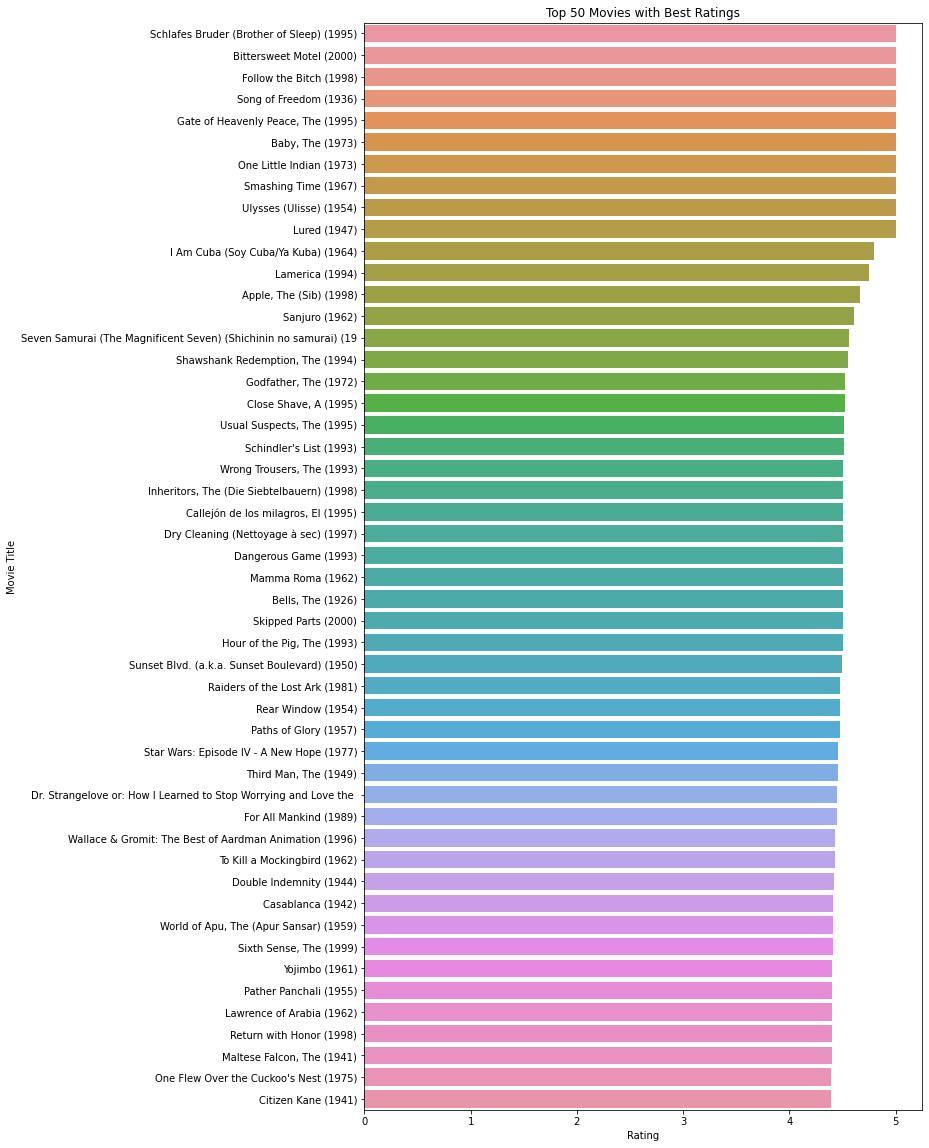

In [131]:
def plotting_best_50(las_mejores_50):
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    fig, ax = plt.subplots(figsize=(10, 20))
    ax.set_title('Top 50 Movies with Best Ratings')
    splot = sns.barplot(las_mejores_50['rating'], las_mejores_50['title'], ax=ax)
    ax.set(xlabel='Rating', ylabel='Movie Title')

plotting_best_50(las_mejores_50)